In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('train.csv', dtype={'id': np.int16, 'target': np.int8})
df_test = pd.read_csv('test.csv', dtype={'id': np.int16})

print('Training Set Shape = {}'.format(df_train.shape))
print('Training Set Memory Usage = {:.2f} MB'.format(df_train.memory_usage().sum() / 1024**2))
print('Test Set Shape = {}'.format(df_test.shape))
print('Test Set Memory Usage = {:.2f} MB'.format(df_test.memory_usage().sum() / 1024**2))

Training Set Shape = (7613, 5)
Training Set Memory Usage = 0.20 MB
Test Set Shape = (3263, 4)
Test Set Memory Usage = 0.08 MB


In [3]:
df_train.shape

(7613, 5)

In [4]:
df_train.info

<bound method DataFrame.info of          id keyword location                                               text  target
0         1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...       1
1         4     NaN      NaN             Forest fire near La Ronge Sask. Canada       1
2         5     NaN      NaN  All residents asked to 'shelter in place' are ...       1
3         6     NaN      NaN  13,000 people receive #wildfires evacuation or...       1
4         7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...       1
...     ...     ...      ...                                                ...     ...
7608  10869     NaN      NaN  Two giant cranes holding a bridge collapse int...       1
7609  10870     NaN      NaN  @aria_ahrary @TheTawniest The out of control w...       1
7610  10871     NaN      NaN  M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...       1
7611  10872     NaN      NaN  Police investigating after an e-bike collided ...       1


In [5]:
df_train.sample(5)

,id,keyword,location,text,target
101,145,accident,"Nairobi, Kenya",I still have not heard Church Leaders of Kenya...,0
3619,5166,fatalities,NaN,Las Vegas in top 5 cities for red-light runnin...,0
2220,3177,deluge,"Enniscrone & Aughris, Sligo",Back on the beach after the deluge. Surf camp...,1
129,185,aftershock,"Hermosa Beach, CA",Tried orange aftershock today. My life will ne...,0
5064,7218,natural%20disaster,sÌ£o luis,And you're loving me like water slipping throu...,0


In [6]:
df_train['text'][:5]

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

In [7]:
df_train['text'].sample(5)

966     New Ladies Shoulder Tote Handbag Faux Leather ...
1555    @laevantine Fortunately I reworked the plumbin...
1087    The bomb was so appropriate ?? seen as my fami...
6327    SpaceX Founder Musk: Structural Failure Took D...
4548                         so paulista injured wilshere
Name: text, dtype: object

In [8]:
df_train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [18]:
df_train["keyword"].replace({"%20": " "}, inplace=True)

In [19]:
df_train['keyword'].value_counts()

no_keyword               61
fatalities               45
deluge                   42
armageddon               42
damage                   41
body%20bags              41
harm                     41
sinking                  41
collided                 40
evacuate                 40
siren                    40
outbreak                 40
twister                  40
fear                     40
windstorm                40
weapon                   39
famine                   39
hellfire                 39
sunk                     39
whirlwind                39
earthquake               39
explosion                39
weapons                  39
wreckage                 39
sinkhole                 39
collision                39
wrecked                  39
derailment               39
flames                   39
deaths                   38
flooding                 38
explode                  38
thunder                  38
upheaval                 38
injury                   38
drowned             

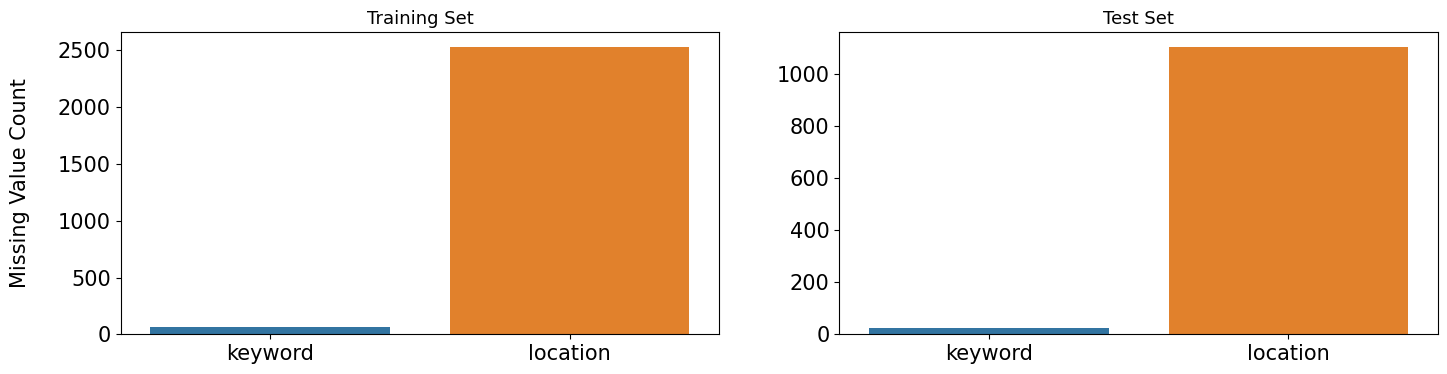

In [11]:
missing_cols = ['keyword', 'location']

fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)

sns.barplot(x=df_train[missing_cols].isnull().sum().index, y=df_train[missing_cols].isnull().sum().values, ax=axes[0])
sns.barplot(x=df_test[missing_cols].isnull().sum().index, y=df_test[missing_cols].isnull().sum().values, ax=axes[1])

axes[0].set_ylabel('Missing Value Count', size=15, labelpad=20)
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Training Set', fontsize=13)
axes[1].set_title('Test Set', fontsize=13)

plt.show()

for df in [df_train, df_test]:
    for col in ['keyword', 'location']:
        df[col] = df[col].fillna(f'no_{col}')

Text(0, 0.5, 'samples')

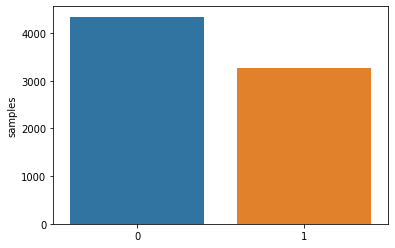

In [14]:
x = df_train.target.value_counts()
sns.barplot(x = x.index, y = x)
plt.gca().set_ylabel('samples')

In [13]:
print(f'Number of unique values in keyword = {df_train["keyword"].nunique()} (Training) - {df_test["keyword"].nunique()} (Test)')
print(f'Number of unique values in location = {df_train["location"].nunique()} (Training) - {df_test["location"].nunique()} (Test)')

Number of unique values in keyword = 222 (Training) - 222 (Test)
Number of unique values in location = 3342 (Training) - 1603 (Test)
